<a href="https://colab.research.google.com/github/Arzeezar/cardio-predict/blob/main/cardiovascular_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prepare data
from: https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

size: **3MB**



---


Features:

*   ข้อมูลที่เป็นข้อเท็จจริง
  1.  **age** | Age| int (days) 
 2.  **height**  | Height | int (cm) 
 3.   **weight** | Weight  | float (kg) 
 4.  **gender** | Gender | categorical code (1-ผู้หญิง 2-ผู้ชาย)


* ข้อมูลทางการแพทย์ของผู้ป่วย
 5.  **ap_hi** |  Systolic blood pressure |int | **แรงดันเลือดในขณะที่หัวใจบีบตัว ซึ่งอาจจะสูงตามอายุ**
 6.  **ap_lo** | Diastolic blood pressure |  int |**ความดันของหลอดเลือดแดงขณะที่หัวใจคลายตัว**
 7.   **cholesterol** | Cholesterol  (1: normal, 2: above normal, 3: well above normal )
 8.   **gluc**| Glucose ( 1: normal, 2: above normal, 3: well above normal )


* ข้อมูลที่ได้จากการให้ข้อมูลของผู้ป่วย
 9.   **smoke** | Smoking | binary |  
 10.   **alco**  | Alcohol intake | binary |
 11.   **active** | Physical activity | binary |
 12.   **cardio** | Presence or absence of cardiovascular disease | binary |



---
dataset นี้มี **2 label** คือ 
* เป็นโรคหัวใจและหลอดเลือด(class **1**) มี 35,000 ข้อมูล
* ไม่เป็นโรคหัวใจและหลอดเลือด(class **0**) มี 35,000 ข้อมูล



In [ ]:
pip install scikit-plot  #ติดตั้ง scikitplot

In [ ]:
##prepare data
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier
import numpy as np # linear algebra
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
##NN
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD,Adam
from keras.layers import Dropout
from keras.constraints import maxnorm
import matplotlib.pyplot as plt
##decision tree
from sklearn.tree import DecisionTreeClassifier
##XGBoost
import xgboost as xgb
from matplotlib.pylab import rcParams
##performance evaluation
from sklearn.metrics import classification_report
import scikitplot as skplt #use for ROC curve

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cardio_train.csv', header=0, sep=";")
data1=data.columns
data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data[data.isnull().any(axis=1)].head() ##เช็คว่ามี row ที่มีค่า null ไหม

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


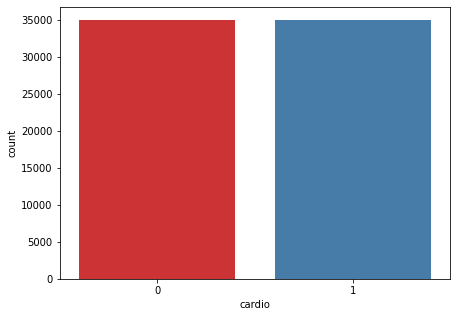

In [ ]:
##ดูจำนวนของข้อมูลในแต่ละคลาส
data[["cardio","height"]].groupby("cardio").count()
plt.figure(figsize=(7,5))
sns.countplot(x="cardio", data=data, palette="Set1")

In [ ]:
##แบ่งข้อมูลออกเป็น input และ output และทำการตัดแบ่งข้อมูลออกเป็น train และ test โดย test มีจำนวน 20% จากข้อมูลทั้งหมด
##Hold one out method
X=data.iloc[:,1:12]
Y=data.iloc[:,-1]
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Multilayer Perceptron

In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=11, activation='softsign'))
model.add(Dense(50, activation='sigmoid')) # [0,1]
model.add(Dense(30, activation='softsign')) # [-1,1] มีช่วงขอบเขตคล้ายกับ tanh function แต่ softsign จะมีลักษณะกราฟเป็น polynomial (ช่วงความโค้ง smooth กว่า) ส่วน tanh มีลักษณะกราฟเป็น exponential
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='softsign'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy']) # ใช้ binary_crossentropy เนื่องจาก output เป็น binary class(1 หรือ 0)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 250)               3000      
_________________________________________________________________
dense_7 (Dense)              (None, 50)                12550     
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 17,451
Trainable params: 17,451
Non-trainable params: 0
__________________________________________________

Epoch 1/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6936 - accuracy: 0.4972
Epoch 2/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6934 - accuracy: 0.5024
Epoch 3/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6934 - accuracy: 0.5042
Epoch 4/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6934 - accuracy: 0.4993
Epoch 5/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6934 - accuracy: 0.4952
Epoch 6/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6934 - accuracy: 0.4940
Epoch 7/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.5003
Epoch 8/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6932 - accuracy: 0.4991
Epoch 9/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.6933 - accuracy: 0.5013
Epoch 10/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.693

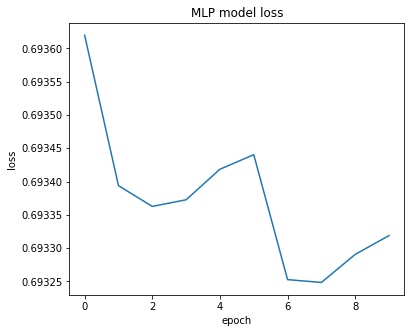

In [ ]:
history = model.fit(X_train, y_train,  epochs=10)
plt.figure(figsize=(6,5))
plt.plot(history.history['loss'])
plt.title('MLP model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Decision tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion='entropy') 
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
##print("accuracy of decision tree for test data = ", acc_decision_tree) ##train data accuracy

In [ ]:
y_pred_en = decision_tree.predict(X_test)
##print('predicted test:', y_pred_en)
##print('actual test:', y_test)
##print('error : ' , sum(abs(y_test - y_pred_en)), 'out of', len(X_test))

In [ ]:
result = decision_tree.score(X_test, y_test)
print("Accuracy of decision tree for test_data=  ", round(result*100,2))

Accuracy of decision tree for test_data=   63.62


In [ ]:
target_names = ['not cardio', 'cardio']                # define target class name

decision_tree.fit(X_train, y_train) 
y_from_model = decision_tree.predict(X_test)                    
print(classification_report(y_test, y_from_model , target_names=target_names))  

              precision    recall  f1-score   support

  not cardio       0.64      0.64      0.64      7084
      cardio       0.63      0.63      0.63      6916

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



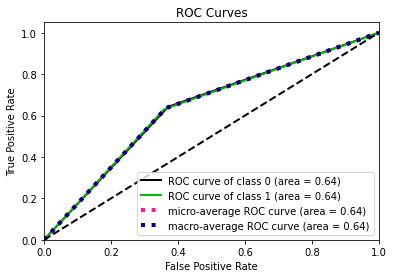

In [ ]:
predicted_probas = decision_tree.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

# XGboost

In [ ]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

xgb_model.fit(X_train, y_train)

result = xgb_model.score(X_test, y_test)
print("accuracy of XGBoost for test data= ", round(result*100,2))

y_pred_en = xgb_model.predict(X_test)
#print('predicted test:', y_pred_en)
#print('actual test:', y_test)
print('total error : ' , sum(abs(y_test - y_pred_en)), 'out of', len(X_test))

accuracy of XGBoost for test data=  73.48
total error :  3713 out of 14000


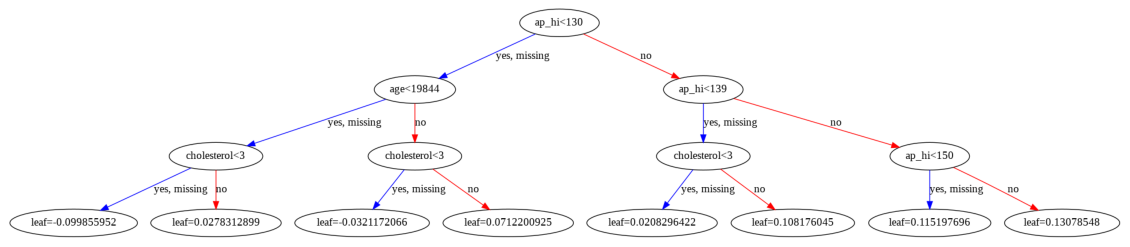

In [ ]:
rcParams['figure.figsize'] = 20,20
xgb.plot_tree(xgb_model, num_trees=1)

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cardio_test.csv', header=0, sep=";")
data1=data.columns
data.head()
X_test_1=data.iloc[:,1:12]
Y_test_1=data.iloc[:,-1]
print(Y_test_1)

0    0
Name: cardio, dtype: int64


In [ ]:
 y_pred_en=xgb_model.predict(X_test_1) 
print('predicted test:', y_pred_en)
print('actual test:', Y_test_1)

predicted test: [0]
actual test: 0    0
Name: cardio, dtype: int64


# Performance evaluation
---


*   F score table
*   precision / recall
*   F1
*   ROC-Curve




In [ ]:
#แสดงกราฟในขนาดพอดี
%matplotlib inline  

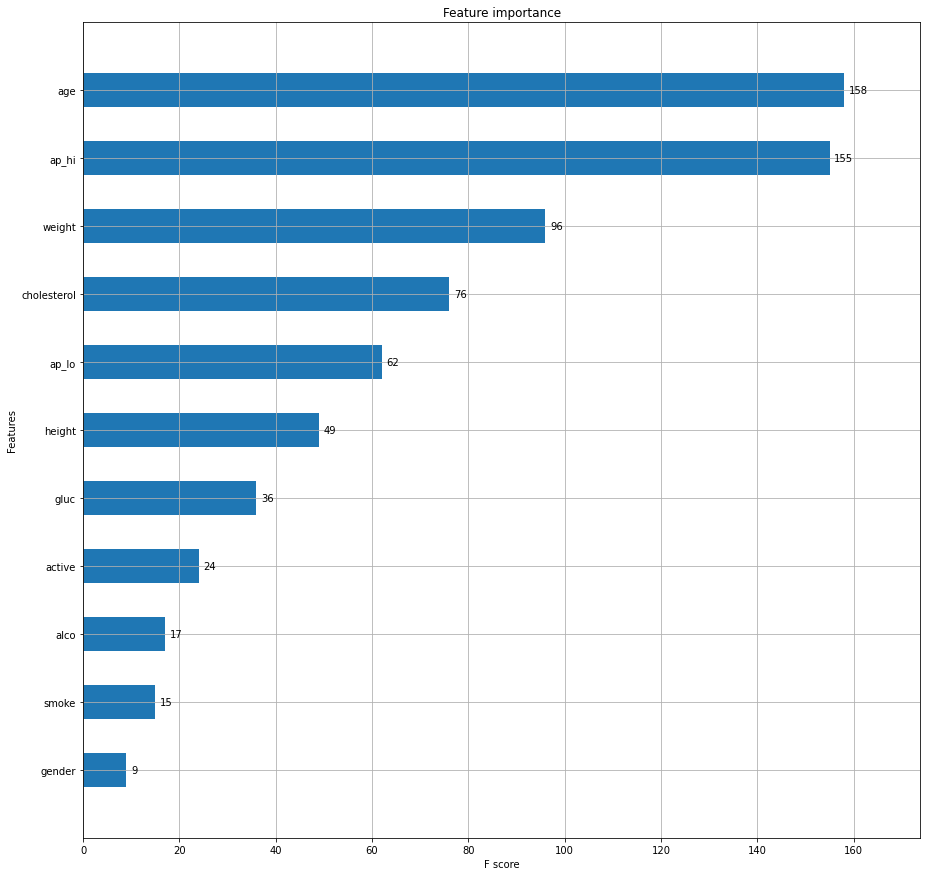

In [ ]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(xgb_model ,ax = axes,height =0.5)

plt.show();
plt.close()

In [ ]:
target_names = ['not cardio', 'cardio']                # define target class name

xgb_model.fit(X_train, y_train) 
y_from_model = xgb_model.predict(X_test)                    
print(classification_report(y_test, y_from_model , target_names=target_names))  

              precision    recall  f1-score   support

  not cardio       0.72      0.77      0.75      7084
      cardio       0.75      0.70      0.72      6916

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



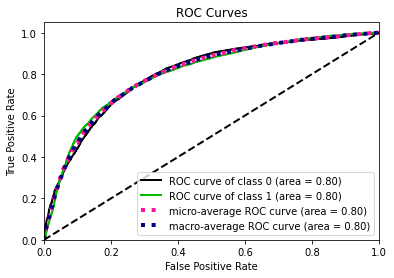

In [ ]:
predicted_probas = xgb_model.predict_proba(X_test)

skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()